In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
# load data
df = pd.read_csv("Article_top_Data.csv")
# group by Date
df['Day'] = df['Date'].map(lambda x: 1 if len(pd.bdate_range(x, x)) else 0 )

# group by Hour
df['Hour'] = df['Hour'].map(lambda x: 0 if int(x)>=5 and int(x)<=8
                                            else 1 if int(x)>=9 and int(x)<=12
                                            else 2 if int(x)>=13 and int(x)<=16
                                            else 3)

# # group month by seasons
# df['Month'] = df['Month'].map(lambda x: 0 if int(x)>=3 and int(x)<=5 
#                                             else 1 if int(x)>=6 and int(x)<=8 
#                                             else 2 if int(x)>=9 and int(x)<=11
#                                             else 3)

# # add temperature for each seasons
# df.loc[(df.Month==0), 'Temp'] = 2.28
# df.loc[(df.Month==1), 'Temp'] = 8.9
# df.loc[(df.Month==2), 'Temp'] = 19.57
# df.loc[(df.Month==3), 'Temp'] = 10.06

df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Timestamp,Month,Day,Hour,Group
0,4,2022-01-03,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,2022-01-03 09:21:14,1,1,1,Milch
1,6,2022-01-03,1001,1,296,7,09:21:14,999999998025,Pfandartikel (Tandem) - EW,1.0,2022-01-03 09:21:14,1,1,1,Pfandartikel
2,7,2022-01-03,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,2022-01-03 09:21:14,1,1,1,Schlaufentragetasche ST
3,19,2022-01-03,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,1,1,BO-Laugenbreze 1ST
4,20,2022-01-03,1001,1,300,2,09:25:34,421791,BO-Laugenbreze 1ST,1.0,2022-01-03 09:25:34,1,1,1,BO-Laugenbreze 1ST


In [3]:
df.shape

(4905502, 15)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import time

In [4]:
# encoder = LabelEncoder()
# df['StoreNumber'] = encoder.fit_transform(df['StoreNumber'])
# store_mapping = {index : label for index, label in enumerate(encoder.classes_)}
# print(store_mapping)

# df['ArticleName'] = encoder.fit_transform(df['ArticleName'])
# article_mapping = {index : label for index, label in enumerate(encoder.classes_)}
# print(article_mapping)

# All frequent articles

------------article : Milch-------------
(1344, 4)
Lasso score=0.46547249771729493
Lasso rmse=143.13390416118858
Lasso r2=0.5010789000680642
MLP score=0.16033216136019146
MLP rmse=180.58327156855222
MLP r2=0.20585122590357396
Adaboost score=0.6948061330925959
Adaboost rmse=104.08496112589307
Adaboost r2=0.7361708337250701
Random forest score=0.9790802144853731
Random forest rmse=72.72935515483157
Random forest r2=0.8711850378284816
Extra tree score=0.9999991717236152
Extra tree rmse=83.67311610761497
Extra tree r2=0.8295022223951372


<AxesSubplot:title={'center':'Milch'}>

------------article : Pfandartikel-------------
(1344, 4)
Lasso score=0.6051857474263407
Lasso rmse=1523.9020170036213
Lasso r2=0.611125797924156
MLP score=-0.0742118046713014
MLP rmse=2559.0792318620056
MLP r2=-0.09663602835378304
Adaboost score=0.7707468461629956
Adaboost rmse=1085.944311807843
Adaboost r2=0.8025258946837563
Random forest score=0.9903439639512494
Random forest rmse=644.1093591097879
Random forest r2=0.9305272861137367
Extra tree score=0.9999999207031136
Extra tree rmse=821.3244218884196
Extra tree r2=0.8870400429532124


<AxesSubplot:title={'center':'Pfandartikel'}>

------------article : Schlaufentragetasche ST-------------
(1340, 4)
Lasso score=0.5538950149614783
Lasso rmse=78.93608380250204
Lasso r2=0.5322355449628169
MLP score=0.4389272197236983
MLP rmse=89.27045642451525
MLP r2=0.4017377842790155
Adaboost score=0.8119633962891325
Adaboost rmse=52.47630703463861
Adaboost r2=0.7932704337441785
Random forest score=0.9910799846889626
Random forest rmse=32.35268612499567
Random forest r2=0.9214227630650611
Extra tree score=0.9999970076187161
Extra tree rmse=36.48803381168662
Extra tree r2=0.9000513372439536


<AxesSubplot:title={'center':'Schlaufentragetasche ST'}>

------------article : BO-Laugenbreze 1ST-------------
(1113, 4)
Lasso score=0.5361638616936827
Lasso rmse=140.86286293967626
Lasso r2=0.556503691378138
MLP score=0.01537758071471429
MLP rmse=212.13802082783664
MLP r2=-0.005851836231922203
Adaboost score=0.7303289359135162
Adaboost rmse=125.93739568273296
Adaboost r2=0.6455080284730264
Random forest score=0.9778110548904644
Random forest rmse=85.52030015162453
Random forest r2=0.8365309944866639
Extra tree score=0.9999991353193679
Extra tree rmse=90.79315803659154
Extra tree r2=0.8157518091053504


<AxesSubplot:title={'center':'BO-Laugenbreze 1ST'}>

------------article : Avocado vorgereift ST-------------
(1341, 4)
Lasso score=0.4356409563263475
Lasso rmse=83.97320118196787
Lasso r2=0.39708129288286975
MLP score=0.3745885580875199
MLP rmse=88.88699280147684
MLP r2=0.32445580354387427
Adaboost score=0.6704273108861021
Adaboost rmse=65.69528410217015
Adaboost r2=0.6309835466467753
Random forest score=0.9902115600377953
Random forest rmse=27.888115397011365
Random forest r2=0.9335009143416044
Extra tree score=0.9999994996963114
Extra tree rmse=32.75979012648759
Extra tree r2=0.9082386990999501


<AxesSubplot:title={'center':'Avocado vorgereift ST'}>

------------article : VL Eier BH 10ST -------------
(1342, 4)
Lasso score=0.43691743673044126
Lasso rmse=55.58051553108304
Lasso r2=0.47340120837060995
MLP score=0.3464899612897393
MLP rmse=60.29073380198546
MLP r2=0.38036512073163065
Adaboost score=0.6802090078113576
Adaboost rmse=42.876266641143495
Adaboost r2=0.686621900136378
Random forest score=0.990436252313782
Random forest rmse=21.385924141003688
Random forest r2=0.9220366017551473
Extra tree score=0.9999977159090526
Extra tree rmse=24.534221858123455
Extra tree r2=0.8973924558456238


<AxesSubplot:title={'center':'VL Eier BH 10ST '}>

------------article : M.I. Mozzarella oGt 125g-------------
(1340, 4)
Lasso score=0.551426116097737
Lasso rmse=55.036783485443166
Lasso r2=0.5531378481386904
MLP score=0.48888943816448516
MLP rmse=59.69399755639924
MLP r2=0.4743110956974702
Adaboost score=0.7572154527649145
Adaboost rmse=38.867656611103804
Adaboost r2=0.7771338052863839
Random forest score=0.9879051336482849
Random forest rmse=22.48298645311041
Random forest r2=0.925428053190036
Extra tree score=0.9999990506552557
Extra tree rmse=27.921265087105212
Extra tree r2=0.8849894534482401


<AxesSubplot:title={'center':'M.I. Mozzarella oGt 125g'}>

------------article : Gurken ST-------------
(1344, 4)
Lasso score=0.46992100592936537
Lasso rmse=134.11644049979427
Lasso r2=0.46535520703098154
MLP score=0.24369269667518578
MLP rmse=156.26767435938646
MLP r2=0.27416216573165075
Adaboost score=0.7612912099896008
Adaboost rmse=92.17928933107305
Adaboost r2=0.7474379956814591
Random forest score=0.9909786168982441
Random forest rmse=50.916801621628174
Random forest r2=0.9229409705311179
Extra tree score=0.9999991888011523
Extra tree rmse=59.6694467472572
Extra tree r2=0.8941708454739067


<AxesSubplot:title={'center':'Gurken ST'}>

------------article : Broetchen-------------
(1174, 4)
Lasso score=0.3836632760821099
Lasso rmse=505.2237252531459
Lasso r2=0.3916664401202863
MLP score=-0.008767496404857633
MLP rmse=672.8449969535159
MLP r2=-0.07895754721105441
Adaboost score=0.5236474152481132
Adaboost rmse=458.45819887156716
Adaboost r2=0.49907375069800997
Random forest score=0.9745152775593957
Random forest rmse=280.0154889357183
Random forest r2=0.8131305050332893
Extra tree score=1.0
Extra tree rmse=338.44775438277355
Extra tree r2=0.7270031876722366


<AxesSubplot:title={'center':'Broetchen'}>

------------article : GL Sahne 30% 200g VLOG-------------
(1342, 4)
Lasso score=0.4322069155932955
Lasso rmse=54.05203393484003
Lasso r2=0.45719740003832243
MLP score=0.3357831525763777
MLP rmse=58.36925483410039
MLP r2=0.3670256147784
Adaboost score=0.7463970771897346
Adaboost rmse=41.58124327060108
Adaboost r2=0.67877245491129
Random forest score=0.9877409111647133
Random forest rmse=23.856357065918
Random forest r2=0.894263217620758
Extra tree score=0.9999991669424868
Extra tree rmse=26.067535305135344
Extra tree r2=0.8737539558780343


<AxesSubplot:title={'center':'GL Sahne 30% 200g VLOG'}>

------------article : Bananen Lose-------------
(1344, 4)
Lasso score=0.4305768220101187
Lasso rmse=94.60067416461013
Lasso r2=0.4454877402732317
MLP score=0.23876422975898715
MLP rmse=108.50080452240816
MLP r2=0.27056162636281633
Adaboost score=0.7776248818297696
Adaboost rmse=55.693223238405096
Adaboost r2=0.807811500362883
Random forest score=0.9892739180065311
Random forest rmse=30.840795324071973
Random forest r2=0.9410649267125694
Extra tree score=1.0
Extra tree rmse=42.36500285104592
Extra tree r2=0.8887917082714223


<AxesSubplot:title={'center':'Bananen Lose'}>

------------article : Zeitschriften 7%-------------
(1249, 4)
Lasso score=0.36298373007094054
Lasso rmse=80.6716611261007
Lasso r2=0.33143052548222474
MLP score=0.19481774606117674
MLP rmse=88.26383760176863
MLP r2=0.19966804649157055
Adaboost score=0.746567545334387
Adaboost rmse=51.836081855909335
Adaboost r2=0.7239619960209098
Random forest score=0.9930438933626002
Random forest rmse=17.351364242233714
Random forest r2=0.969070578457826
Extra tree score=0.999987980810163
Extra tree rmse=19.198770204248905
Extra tree r2=0.962133831313558


<AxesSubplot:title={'center':'Zeitschriften 7%'}>

------------article : Kiwi Gruen ST-------------
(1327, 4)
Lasso score=0.3525191443050407
Lasso rmse=83.62892635241899
Lasso r2=0.35560781400755026
MLP score=0.26726282094994447
MLP rmse=90.78503350784074
MLP r2=0.24060848658985712
Adaboost score=0.6650231129585901
Adaboost rmse=65.88045459641752
Adaboost r2=0.6001009268945406
Random forest score=0.9743807018165888
Random forest rmse=43.391590571570745
Random forest r2=0.8265204196210172
Extra tree score=0.9999897510118517
Extra tree rmse=50.552827896157545
Extra tree r2=0.7645340399645133


<AxesSubplot:title={'center':'Kiwi Gruen ST'}>

------------article : AugustinerHellMW1x0,5LFL-------------
(1039, 4)
Lasso score=0.5235601945452639
Lasso rmse=79.75977689265619
Lasso r2=0.5131563384211003
MLP score=0.3796634015403504
MLP rmse=90.84709336875555
MLP r2=0.36839765672223235
Adaboost score=0.6999908665708956
Adaboost rmse=68.51211716334988
Adaboost r2=0.6407833687011897
Random forest score=0.9731332924767285
Random forest rmse=53.409948724525194
Random forest r2=0.7816938446531667
Extra tree score=0.9999992087535237
Extra tree rmse=55.52077634047202
Extra tree r2=0.7640974043302473


<AxesSubplot:title={'center':'AugustinerHellMW1x0,5LFL'}>

------------article : SammelNr. Lose Backwaren-------------
(147, 4)
Lasso score=0.333649414725918
Lasso rmse=721.7195030430777
Lasso r2=0.4261858548170385
MLP score=-0.7235130675585586
MLP rmse=1316.5874708008075
MLP r2=-0.9095621719029663
Adaboost score=0.7712092827104609
Adaboost rmse=656.9620381542745
Adaboost r2=0.5245389805835388
Random forest score=0.959390466174701
Random forest rmse=505.62862566644037
Random forest r2=0.7183578354970019
Extra tree score=1.0
Extra tree rmse=351.2824345451961
Extra tree r2=0.8640600095687222


<AxesSubplot:title={'center':'SammelNr. Lose Backwaren'}>

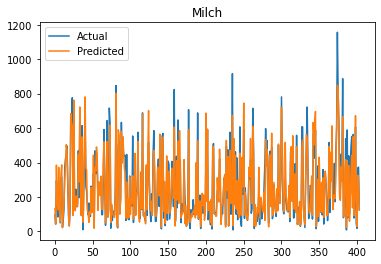

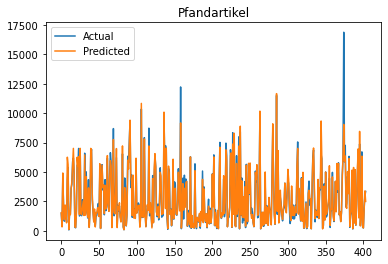

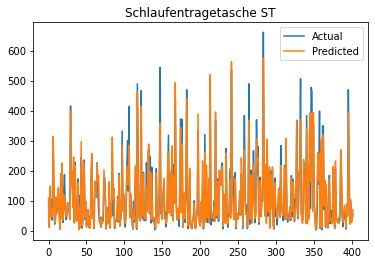

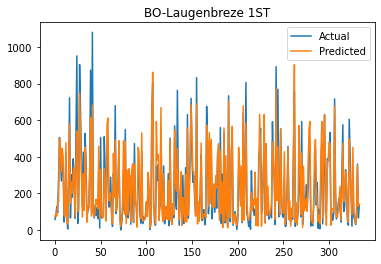

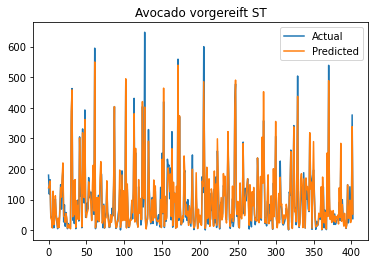

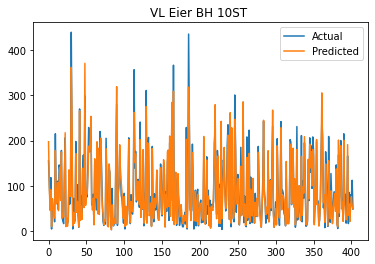

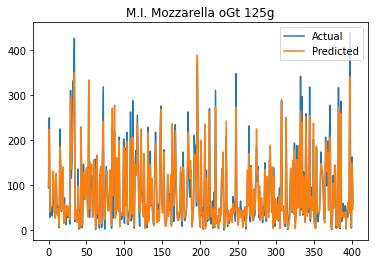

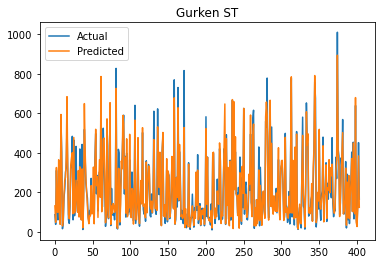

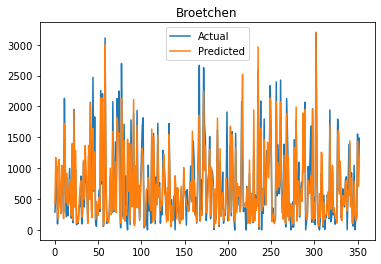

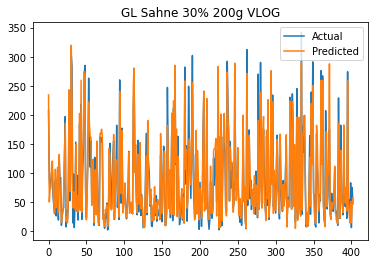

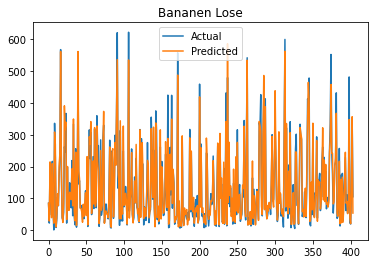

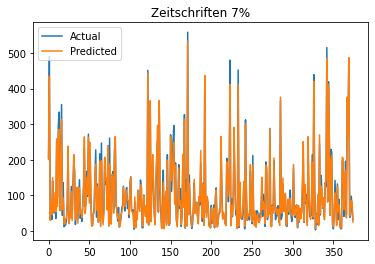

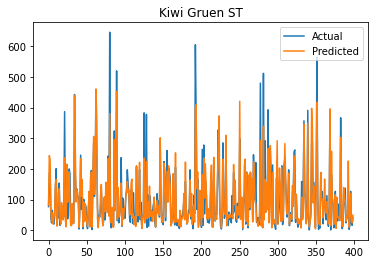

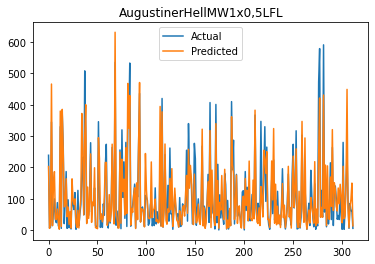

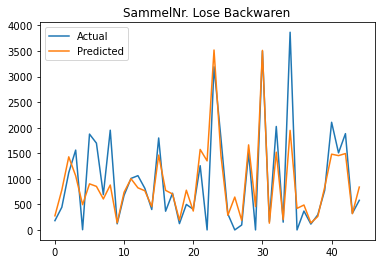

In [6]:
lasso_dict = {'score':0 , 'rmse':0, 'r2':0}
mlp_dict = {'score':0 , 'rmse':0, 'r2':0}
ada_dict = {'score':0 , 'rmse':0, 'r2':0}
rf_dict = {'score':0 , 'rmse':0, 'r2':0}
et_dict = {'score':0 , 'rmse':0, 'r2':0}
training_time = []

for article_name in list(df['Group'].unique()):
    # select article
    print(f"------------article : {article_name}-------------")
    article = df.loc[:,['StoreNumber', 'Month', 'Quantity', 'Day', 'Hour']][df.Group == article_name]
    article = article.groupby(['StoreNumber', 'Month', 'Day', 'Hour'])['Quantity'].sum().reset_index()

    # separate features and outcome
    x = article.drop('Quantity', axis=1)
    encoder = LabelEncoder()
    for col in x.columns:
        x[col] = encoder.fit_transform(x[col])
    y = article['Quantity']

    print(x.shape)
    # # standardize features value into [0,1]
    # scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    # x = pd.DataFrame(scaler.fit_transform(x), columns=x.keys())

    # # set train data and test data
    x_train,x_test, y_train, y_test =train_test_split(x, y, test_size=0.3, random_state=0)

    start_time = time.time()
    # apply machine learning algo
    # Lasso
    lasso = Lasso()
    lasso.fit(x_train,y_train)

    # Neural Network
    mlp = MLPRegressor()
    mlp.fit(x_train,y_train)
    

    # Adaboost
    ada = AdaBoostRegressor()
    ada.fit(x_train,y_train)

    # Random forest
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)

    # Extra tree
    et = ExtraTreesRegressor()
    et.fit(x_train,y_train)

    end_time = time.time()
    duration = end_time - start_time
    training_time.append(duration)

    # prediction
    y_lasso = lasso.predict(x_test)
    y_mlp = mlp.predict(x_test)
    y_ada = ada.predict(x_test)
    y_rf = rf.predict(x_test)
    y_et = et.predict(x_test)

    # show results
    # Lasso
    print(f'Lasso score={lasso.score(x_train, y_train)}')
    print(f'Lasso rmse={mse(y_test, y_lasso, squared=False)}')
    print(f'Lasso r2={r2(y_test, y_lasso)}')
    lasso_dict['score'] += lasso.score(x_train, y_train)
    lasso_dict['rmse'] += mse(y_test, y_lasso, squared=False)
    lasso_dict['r2'] += r2(y_test, y_lasso)

    # MLP
    print(f'MLP score={mlp.score(x_train, y_train)}')
    print(f'MLP rmse={mse(y_test, y_mlp, squared=False)}')
    print(f'MLP r2={r2(y_test, y_mlp)}')
    mlp_dict['score'] += mlp.score(x_train, y_train)
    mlp_dict['rmse'] += mse(y_test, y_mlp, squared=False)
    mlp_dict['r2'] += r2(y_test, y_mlp)

    # Adaboost
    print(f'Adaboost score={ada.score(x_train, y_train)}')
    print(f'Adaboost rmse={mse(y_test, y_ada, squared=False)}')
    print(f'Adaboost r2={r2(y_test, y_ada)}')
    ada_dict['score'] += ada.score(x_train, y_train)
    ada_dict['rmse'] += mse(y_test, y_ada, squared=False)
    ada_dict['r2'] += r2(y_test, y_ada)
    
    # Random forest
    print(f'Random forest score={rf.score(x_train, y_train)}')
    print(f'Random forest rmse={mse(y_test, y_rf, squared=False)}')
    print(f'Random forest r2={r2(y_test, y_rf)}')
    rf_dict['score'] += rf.score(x_train, y_train)
    rf_dict['rmse'] += mse(y_test, y_rf, squared=False)
    rf_dict['r2'] += r2(y_test, y_rf)

    # Extra tree
    print(f'Extra tree score={et.score(x_train, y_train)}')
    print(f'Extra tree rmse={mse(y_test, y_et, squared=False)}')
    print(f'Extra tree r2={r2(y_test, y_et)}')
    et_dict['score'] += et.score(x_train, y_train)
    et_dict['rmse'] += mse(y_test, y_et, squared=False)
    et_dict['r2'] += r2(y_test, y_et)
    
    # plot
    data = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf}).reset_index().drop(columns='index')
    display(data.plot(title=f'{article_name}'))

In [7]:
# Evaluation
num_article = df.Group.nunique()
print(f'average Lasso score : {lasso_dict["score"]/num_article}')
print(f'average Lasso rmse : {lasso_dict["rmse"]/num_article}')
print(f'average Lasso r2 : {lasso_dict["r2"]/num_article}')

print(f'average MLP score : {mlp_dict["score"]/num_article}')
print(f'average MLP rmse : {mlp_dict["rmse"]/num_article}')
print(f'average MLP r2 : {mlp_dict["r2"]/num_article}')

print(f'average Adaboost score : {ada_dict["score"]/num_article}')
print(f'average Adaboost rmse : {ada_dict["rmse"]/num_article}')
print(f'average Adaboost r2 : {ada_dict["r2"]/num_article}')

print(f'average Random forest score : {rf_dict["score"]/num_article}')
print(f'average Random forest rmse : {rf_dict["rmse"]/num_article}')
print(f'average Random forest r2 : {rf_dict["r2"]/num_article}')

print(f'average Extra tree score : {et_dict["score"]/num_article}')
print(f'average Extra tree rmse : {et_dict["rmse"]/num_article}')
print(f'average Extra tree r2 : {et_dict["r2"]/num_article}')

average Lasso score : 0.458252142281025
average Lasso rmse : 255.67987395814174
average Lasso r2 : 0.4673767735944055
average MLP score : 0.17853977321784356
average MLP rmse : 388.82725805275703
average MLP r2 : 0.1610758028754911
average Adaboost score : 0.7204965649834777
average Adaboost rmse : 200.46565529914153
average Adaboost r2 : 0.6863130277699594
average Random forest score : 0.9832883494316944
average Random forest rmse : 127.45864657896476
average Random forest r2 : 0.8805115965938318
average Extra tree score : 0.9999977865296407
average Extra tree rmse : 137.37323701255437
average Extra tree r2 : 0.8574340668376073


In [7]:
# training duration
print(training_time)
print(sum(training_time))

[0.7040572166442871, 0.6937341690063477, 0.7093338966369629, 0.5864920616149902, 0.6260950565338135, 0.670644998550415, 0.7096989154815674, 0.7304630279541016, 0.5697109699249268, 0.6545720100402832, 0.6524348258972168, 0.6257972717285156, 0.7954332828521729, 0.5639917850494385, 0.23827409744262695]
9.530733585357666


## BO-Laugenbreze 1ST

In [8]:
article = df.loc[:,['StoreNumber', 'Quantity', 'Month', 'Day','Hour']][df.Group == 'BO-Laugenbreze 1ST']
article = article.groupby(['StoreNumber', 'Month', 'Day','Hour'])['Quantity'].sum().reset_index()
article.head()

,StoreNumber,Month,Day,Hour,Quantity
0,1001,1,0,0,66.0
1,1001,1,0,1,154.0
2,1001,1,0,2,101.0
3,1001,1,0,3,33.0
4,1001,1,1,0,467.0


In [9]:
x = article.drop('Quantity', axis=1)
encoder = LabelEncoder()
for col in x.columns:
    x[col] = encoder.fit_transform(x[col])
y = article['Quantity']

# scaler = MinMaxScaler(copy=True, feature_range=(0,1))
# x = pd.DataFrame(scaler.fit_transform(x), columns=x.keys())
x.head()

,StoreNumber,Month,Day,Hour
0,0,0,0,0
1,0,0,0,1
2,0,0,0,2
3,0,0,0,3
4,0,0,1,0


In [10]:
# x_train = x[x.Month<=0.9]
# y_train = y.iloc[:x_train.shape[0]]
# x_test = x[x.Month>0.9]
# y_test = y.iloc[x_train.shape[0]:]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [11]:

# Neural Network
mlp = MLPRegressor()
mlp.fit(x_train,y_train)
y_mlp = mlp.predict(x_test)

# Random forest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_rfc = rf.predict(x_test)

# Extra tree
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
y_et = et.predict(x_test)


In [12]:
print(f'MLP score={mlp.score(x_train, y_train)}')
print(f'Random forest score={rf.score(x_train, y_train)}')
print(f'Extra tree score={et.score(x_train, y_train)}')


MLP score=0.020241389374755947
Random forest score=0.9776036390230125
Extra tree score=0.9999992430207509


In [13]:
# MLP
print("MLP--------------------")
print(mse(y_test, y_mlp, squared=False))
print(r2(y_test, y_mlp))
# Random forest
print("Random forest--------------------")
print(mse(y_test, y_rfc, squared=False))
print(r2(y_test, y_rfc))
# Extra tree
print("Extra tree--------------------")
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_rfc}).reset_index().drop(columns='index')
print(mse(y_test, y_et, squared=False))
print(r2(y_test, y_et))

MLP--------------------
211.58002984929692
-0.0005673699559034517
Random forest--------------------
87.80241236302376
0.8276902373628654
Extra tree--------------------
88.44362205572163
0.8251643358075879


<AxesSubplot:>

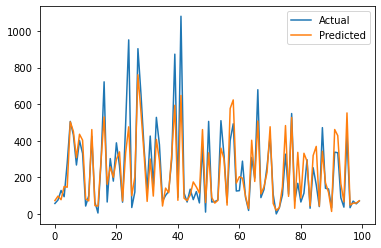

In [14]:
data.head(100).plot()

# Real Case

In [149]:
x_train = x[x.Month<9]
x_test = x[x.Month>=9]

In [150]:
y_train = y.iloc[x_train.index]
y_test = y.iloc[x_test.index]

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 定义参数网格
param_grid = {
    'n_estimators': [0, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [0, 2, 5, 10],
    # 添加其他参数...
}

# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42)

# 使用GridSearchCV执行网格搜索
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# 获取最佳参数组合
best_params = grid_search.best_params_

In [152]:
best_params

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

In [153]:
# Random forest
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
y_rf = rf.predict(x_test)

0.9789006644687346


In [154]:
print(r2(y_test, y_rf))

0.7169522776317587


In [155]:
y_rf.sum()

67754.91

In [138]:
y_test.sum()

74732.0